### aim: how diverse are the stofoo values for the different phyto?

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

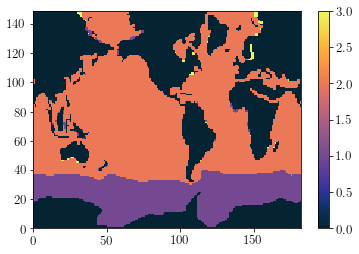

In [24]:
w = xr.open_dataset('/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data//TOM12_TJ_R4A0_y2020_DIA_LoP.nc')

q = plt.pcolormesh(w.limitNut[0,0,:,:], cmap = cm.thermal)
plt.colorbar(q)

In [26]:
print(w.limitNut)

<xarray.DataArray 'limitNut' (time_counter: 12, deptht: 31, y: 149, x: 182)>
[10087896 values with dtype=float64]
Coordinates:
  * time_counter  (time_counter) object 2020-01-16 12:00:00 ... 2020-12-16 12...
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * deptht        (deptht) float32 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Attributes:
    units:      dimensionless
    long_name:  limiting nutrient (1 = NO3, 2 = Si, 3 = PO4, 4 = Fe) 


In [5]:
trst = '01341375'
tn = 1
ds = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/ORCA2_{trst}_restart_trc_000{tn}.nc')

data_vars = list(ds.data_vars.keys())

print(data_vars)

['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'kt', 'ndastp', 'adatrj', 'sbc_Alkalini_b', 'sbc_O2_b', 'sbc_DIC_b', 'sbc_PIIC_b', 'sbc_NO3_b', 'sbc_Si_b', 'sbc_PO4_b', 'sbc_Fer_b', 'sbc_DOC_b', 'sbc_DSi_b', 'sbc_CaCO3_b', 'sbc_ARA_b', 'sbc_GON_b', 'sbc_SFe_b', 'sbc_BFe_b', 'sbc_POC_b', 'sbc_GOC_b', 'sbc_BAC_b', 'sbc_PRO_b', 'sbc_PTE_b', 'sbc_MES_b', 'sbc_GEL_b', 'sbc_MAC_b', 'sbc_DIA_b', 'sbc_MIX_b', 'sbc_COC_b', 'sbc_PIC_b', 'sbc_PHA_b', 'sbc_FIX_b', 'sbc_DFe_b', 'sbc_NFe_b', 'sbc_CFe_b', 'sbc_PFe_b', 'sbc_HFe_b', 'sbc_FFe_b', 'sbc_DCHL_b', 'sbc_NCHL_b', 'sbc_CCHL_b', 'sbc_PCHL_b', 'sbc_HCHL_b', 'sbc_FCHL_b', 'sbc_BSi_b', 'rdttrc1', 'TRNAlkalini', 'TRBAlkalini', 'TRNO2', 'TRBO2', 'TRNDIC', 'TRBDIC', 'TRNPIIC', 'TRBPIIC', 'TRNNO3', 'TRBNO3', 'TRNSi', 'TRBSi', 'TRNPO4', 'TRBPO4', 'TRNFer', 'TRBFer', 'TRNDOC', 'TRBDOC', 'TRNDSi', 'TRBDSi', 'TRNCaCO3', 'TRBCaCO3', 'TRNARA', 'TRBARA', 'TRNGON', 'TRBGON', 'TRNSFe', 'TRBSFe', 'TRNBFe', 'TRBBFe', 'TRNPOC', 'TRBPOC', 'TRNGOC', 'TRBGOC', 'TR

In [6]:
hm = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/ORCA2_1m_20230101_20231231_ptrc_T.nc')

print(list(hm.data_vars.keys()))

['deptht_bounds', 'Alkalini', 'time_centered_bounds', 'time_counter_bounds', 'O2', 'DIC', 'PIIC', 'NO3', 'Si', 'PO4', 'Fer', 'DOC', 'CaCO3', 'ARA', 'POC', 'GOC', 'BAC', 'PRO', 'PTE', 'MES', 'GEL', 'MAC', 'DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX', 'BSi', 'GON']


In [7]:
def get_values(var, tdir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/',\
               trst = '01341375'):
    
    storval = np.zeros([1,31,149,182])

    hm = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/ORCA2_1m_20230101_20231231_ptrc_T.nc')
    hm_nav_lon = hm.nav_lon.values
    hm_nav_lat = hm.nav_lat.values


    for tn in range(0,10):
        print(tn)
        
        ta = f'ORCA2_{trst}_restart_trc_000{tn}.nc'
        ds = xr.open_dataset(f'{tdir}{ta}')
        nav_lon = ds.nav_lon.values
        nav_lat = ds.nav_lat.values

        ds_var = ds[var].values
        
        for sy in range(0,32):
            for sx in range(0,20):
                
                t_lon = nav_lon[sy,sx]
                t_lat = nav_lat[sy,sx]

                q = (np.where((hm_nav_lon == t_lon) & (hm_nav_lat == t_lat)))
                try:
                    ey = q[0][0]
                    ex = q[1][0]
                    storval[:,:,ey,ex] = ds_var[0,:,sy,sx]
                except:
                    pass
                    #print(f'rst {tn}, y {sy} doesnt map, x {sx} doesnt map')

    for tn in range(10,48):
        print(tn)
        ta = f'ORCA2_{trst}_restart_trc_00{tn}.nc'
        ds = xr.open_dataset(f'{tdir}{ta}')
        nav_lon = ds.nav_lon.values
        nav_lat = ds.nav_lat.values
        ds_var = ds[var].values

        for sy in range(0,32):
            for sx in range(0,20):
                
                t_lon = nav_lon[sy,sx]
                t_lat = nav_lat[sy,sx]

                q = (np.where((hm_nav_lon == t_lon) & (hm_nav_lat == t_lat)))
                try:
                    ey = q[0][0]
                    ex = q[1][0]
                    storval[:,:,ey,ex] = ds_var[0,:,sy,sx]
                except:
                    pass
                    #print(f'rst {tn}, y {sy} doesnt map, x {sx} doesnt map')

    return storval

### get out stofoo

In [8]:
####prepare dataset

extract = False
if extract:
    
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmask = tmesh.tmask[0,0,:,:].values

    copied_data = tmesh.copy()

    tdrop = [ 'nav_lon', 'nav_lat', 'nav_lev','time_counter', 'tmask', \
             'e1t', 'e2t', 'e3t_0', 'gdept_0',\
             'gdept_1d', 'e3t_1d',]

    tdrop2 = [ 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', \
              'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', \
              'gphiv', 'gphif', 'e1u', 'e1v', 'e1f', 'e2u', 'e2v', 'e2f', 'ff',\
              'mbathy', 'misf', 'isfdraft', 'e3u_0', 'e3v_0', 'e3w_0', \
               'gdepu', 'gdepv', 'gdepw_0',  'gdepw_1d', 'e3w_1d']

    data = copied_data.drop_vars(tdrop2)

    data = data.assign(TRNDFe=data['e3t_0'])
    storval = get_values('TRNDFe')
    data['TRNDFe'].data = storval

    #tdir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/',\
    #               trst = '01341375'

    data = data.assign(TRNNFe=data['e3t_0'])
    storval = get_values('TRNNFe')
    data['TRNNFe'].data = storval

    data = data.assign(TRNCFe=data['e3t_0'])
    storval = get_values('TRNCFe')
    data['TRNCFe'].data = storval

    data = data.assign(TRNPFe=data['e3t_0'])
    storval = get_values('TRNPFe')
    data['TRNPFe'].data = storval

    data = data.assign(TRNHFe=data['e3t_0'])
    storval = get_values('TRNHFe')
    data['TRNHFe'].data = storval

    data = data.assign(TRNFFe=data['e3t_0'])
    storval = get_values('TRNFFe')
    data['TRNFFe'].data = storval

    data = data.assign(TRNDCHL=data['e3t_0'])
    storval = get_values('TRNDCHL')
    data['TRNDCHL'].data = storval

    data = data.assign(TRNNCHL=data['e3t_0'])
    storval = get_values('TRNNCHL')
    data['TRNNCHL'].data = storval

    data = data.assign(TRNCCHL=data['e3t_0'])
    storval = get_values('TRNCCHL')
    data['TRNCCHL'].data = storval

    data = data.assign(TRNPCHL=data['e3t_0'])
    storval = get_values('TRNPCHL')
    data['TRNPCHL'].data = storval

    data = data.assign(TRNHCHL=data['e3t_0'])
    storval = get_values('TRNHCHL')
    data['TRNHCHL'].data = storval

    data = data.assign(TRNFCHL=data['e3t_0'])
    storval = get_values('TRNFCHL')
    data['TRNFCHL'].data = storval

    #tdir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/',\
                  # trst = '01341375'):
    data.to_netcdf('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')


In [9]:
####prepare dataset

extract = False
if extract:
    
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmask = tmesh.tmask[0,0,:,:].values

    copied_data = tmesh.copy()

    tdrop = [ 'nav_lon', 'nav_lat', 'nav_lev','time_counter', 'tmask', \
             'e1t', 'e2t', 'e3t_0', 'gdept_0',\
             'gdept_1d', 'e3t_1d',]

    tdrop2 = [ 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', \
              'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', \
              'gphiv', 'gphif', 'e1u', 'e1v', 'e1f', 'e2u', 'e2v', 'e2f', 'ff',\
              'mbathy', 'misf', 'isfdraft', 'e3u_0', 'e3v_0', 'e3w_0', \
               'gdepu', 'gdepv', 'gdepw_0',  'gdepw_1d', 'e3w_1d']

    data = copied_data.drop_vars(tdrop2)

    phyt = ['', '','','','','','']
    
    data = data.assign(TRNDIA=data['e3t_0'])
    storval = get_values('TRNDIA')
    data['TRNDIA'].data = storval

    #tdir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/',\
    #               trst = '01341375'

    data = data.assign(TRNMIX=data['e3t_0'])
    storval = get_values('TRNMIX')
    data['TRNMIX'].data = storval

    data = data.assign(TRNCOC=data['e3t_0'])
    storval = get_values('TRNCOC')
    data['TRNCOC'].data = storval

    data = data.assign(TRNPIC=data['e3t_0'])
    storval = get_values('TRNPIC')
    data['TRNPIC'].data = storval

    data = data.assign(TRNPHA=data['e3t_0'])
    storval = get_values('TRNPHA')
    data['TRNPHA'].data = storval

    data = data.assign(TRNFIX=data['e3t_0'])
    storval = get_values('TRNFIX')
    data['TRNFIX'].data = storval

    data = data.assign(TRNDIC=data['e3t_0'])
    storval = get_values('TRNDIC')
    data['TRNDIC'].data = storval

    data = data.assign(TRNFer=data['e3t_0'])
    storval = get_values('TRNFer')
    data['TRNFer'].data = storval

    #tdir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/',\
                  # trst = '01341375'):
    data.to_netcdf('./data/stofoo_output/TOM12_TJ_R4B1_01341375_phytfer.nc')


## look at phytoplankton iron concentrations

All variables: ['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'e1t', 'e2t', 'e3t_0', 'gdept_0', 'gdept_1d', 'e3t_1d', 'TRNDFe', 'TRNNFe', 'TRNCFe', 'TRNPFe', 'TRNHFe', 'TRNFFe', 'TRNDCHL', 'TRNNCHL', 'TRNCCHL', 'TRNPCHL', 'TRNHCHL', 'TRNFCHL', 'csize']


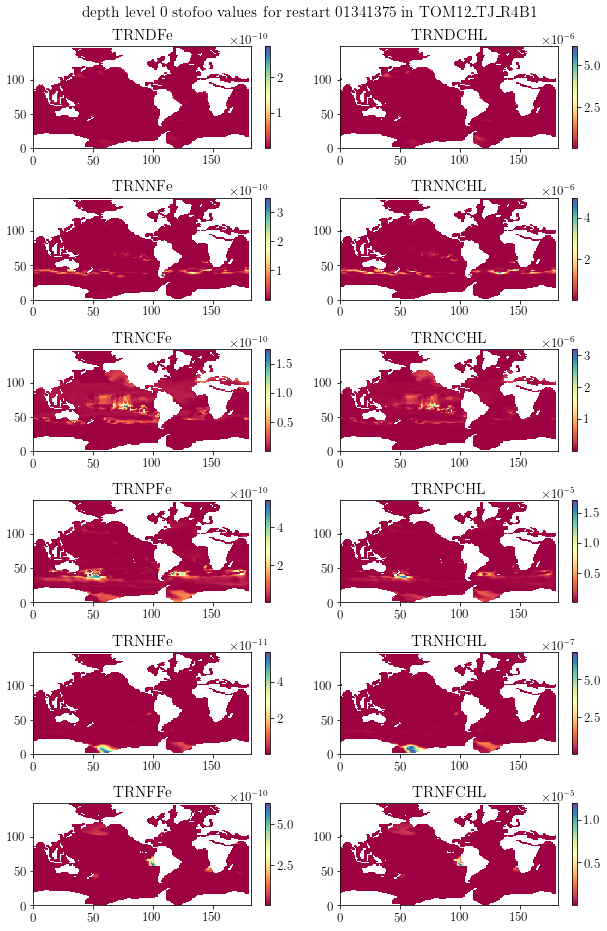

In [10]:
d = 0
w = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')
w = w.assign(csize=w['e3t_0'])
csize = np.zeros([1,31,149,182])
for i in range(0,31):
    csize[0,i,:,:] = w.tmask[0,i,:,:] * w.e1t[0,:,:] * w.e2t[0,:,:]
w['csize'].values = csize

all_vars = list(w.variables.keys())
print("All variables:", all_vars)

vars = ['TRNDFe', 'TRNDCHL',\
        'TRNNFe', 'TRNNCHL',\
        'TRNCFe', 'TRNCCHL',\
        'TRNPFe', 'TRNPCHL',\
        'TRNHFe', 'TRNHCHL',\
        'TRNFFe','TRNFCHL']
 
cmap = plt.get_cmap("Spectral")

fact = 1.1
fig, axs = plt.subplots(6,2, figsize=(8*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    
    tv = w[vars[i]][0,d,:,:].values
    tv[tv == 0] = np.nan
    q = axs[i].pcolormesh(tv, cmap = cmap)
    plt.colorbar(q, ax = axs[i])
    axs[i].set_title(vars[i])
    
plt.suptitle(f'depth level {d} stofoo values for restart 01341375 in TOM12_TJ_R4B1')
plt.tight_layout()

In [11]:
dsp = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_phytfer.nc')
dsp

<xarray.Dataset>
Dimensions:       (t: 1, x: 182, y: 149, z: 31)
Dimensions without coordinates: t, x, y, z
Data variables: (12/19)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    e1t           (t, y, x) float64 ...
    ...            ...
    TRNCOC        (t, z, y, x) float64 ...
    TRNPIC        (t, z, y, x) float64 ...
    TRNPHA        (t, z, y, x) float64 ...
    TRNFIX        (t, z, y, x) float64 ...
    TRNDIC        (t, z, y, x) float64 ...
    TRNFer        (t, z, y, x) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  28/02/2019 15:51:26 +0000

['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'e1t', 'e2t', 'e3t_0', 'gdept_0', 'gdept_1d', 'e3t_1d', 'TRNDFe', 'TRNNFe', 'TRNCFe', 'TRNPFe', 'TRNHFe', 'TRNFFe', 'TRNDCHL', 'TRNNCHL', 'TRNCCHL', 'TRNPCHL', 'TRNHCHL', 'TRNFCHL']
['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'e1t', 'e2t', 'e3t_0', 'gdept_0', 'gdept_1d', 'e3t_1d', 'TRNDIA', 'TRNMIX', 'TRNCOC', 'TRNPIC', 'TRNPHA', 'TRNFIX', 'TRNDIC', 'TRNFer']


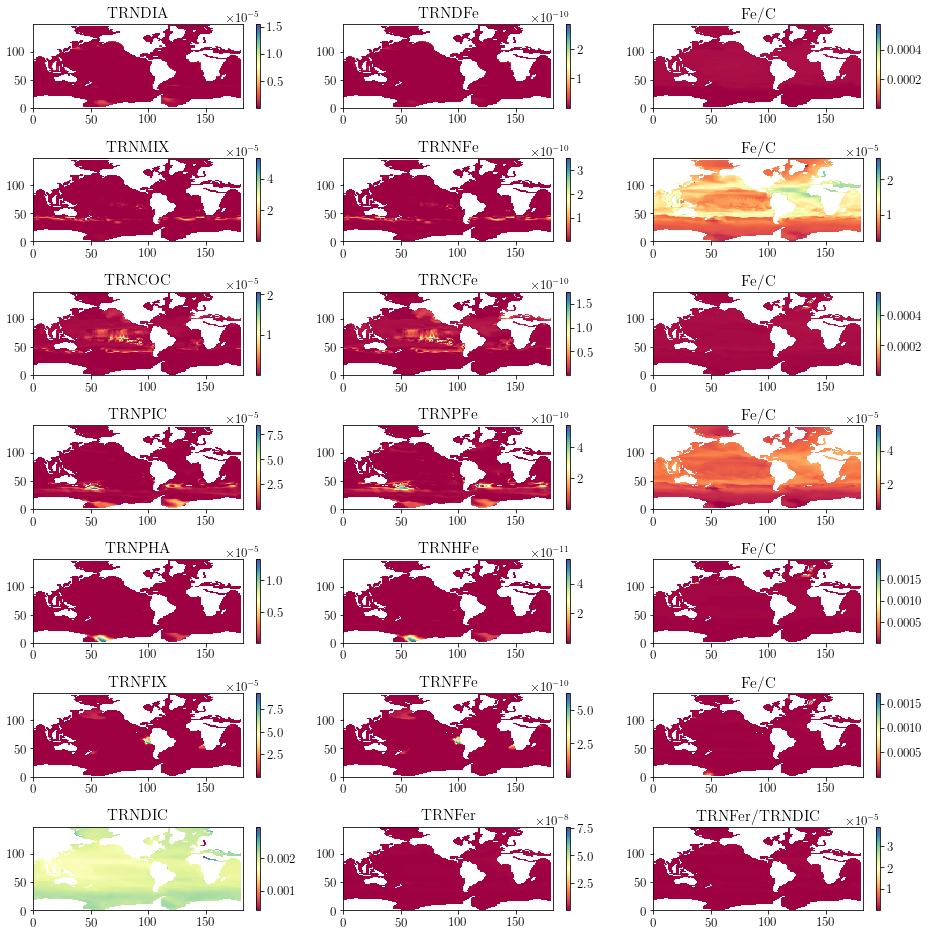

In [12]:
dsp = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_phytfer.nc')
dss = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')

dssv = list(dss.data_vars.keys())
print(dssv)

dspv = list(dsp.data_vars.keys())
print(dspv)

ss =  ['TRNDFe', 'TRNNFe', 'TRNCFe', 'TRNPFe', 'TRNHFe', 'TRNFFe',]
sp =  ['TRNDIA', 'TRNMIX', 'TRNCOC', 'TRNPIC', 'TRNPHA', 'TRNFIX',]

fig, axs = plt.subplots(7,3, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

d = 0

for i in range(0,6):
    
    ind = i*3
    tv = dsp[sp[i]][0,d,:,:].values
    tv[tv == 0] = np.nan
    q = axs[ind].pcolormesh(tv, cmap = cmap)
    plt.colorbar(q, ax = axs[ind])
    axs[ind].set_title(sp[i])
    
    ind = i*3 + 1
    tv = dss[ss[i]][0,d,:,:].values
    tv[tv == 0] = np.nan
    q = axs[ind].pcolormesh(tv, cmap = cmap)
    plt.colorbar(q, ax = axs[ind])
    axs[ind].set_title(ss[i])
    
    ind = i*3 + 2
    tv = dss[ss[i]][0,d,:,:].values/dsp[sp[i]][0,d,:,:].values
    tv[tv == 0] = np.nan
    q = axs[ind].pcolormesh(tv, cmap = cmap)
    plt.colorbar(q, ax = axs[ind])
    axs[ind].set_title('Fe/C')
    
tv = dsp['TRNDIC'][0,d,:,:].values
tv[tv == 0] = np.nan
q = axs[18].pcolormesh(tv, cmap = cmap)
plt.colorbar(q, ax = axs[18])
axs[18].set_title('TRNDIC')

tv = dsp['TRNFer'][0,d,:,:].values
tv[tv == 0] = np.nan
q = axs[19].pcolormesh(tv, cmap = cmap)
plt.colorbar(q, ax = axs[19])
axs[19].set_title('TRNFer')

tv = dsp['TRNFer'][0,d,:,:].values/dsp['TRNDIC'][0,d,:,:].values
tv[tv == 0] = np.nan
q = axs[20].pcolormesh(tv, cmap = cmap)
plt.colorbar(q, ax = axs[20])
axs[20].set_title('TRNFer/TRNDIC')

plt.tight_layout()

In [13]:
from statsmodels.stats.weightstats import DescrStatsW


Text(0.5, 0.98, 'depth level 20 stofoo values for restart 01341375 in TOM12_TJ_R4B1 \n interquartile range shown in black line, x is 0.05 and 0.95 percentiles, extremes shown as vert. lines, \n red median (vert. line) and mean (o) also shown')

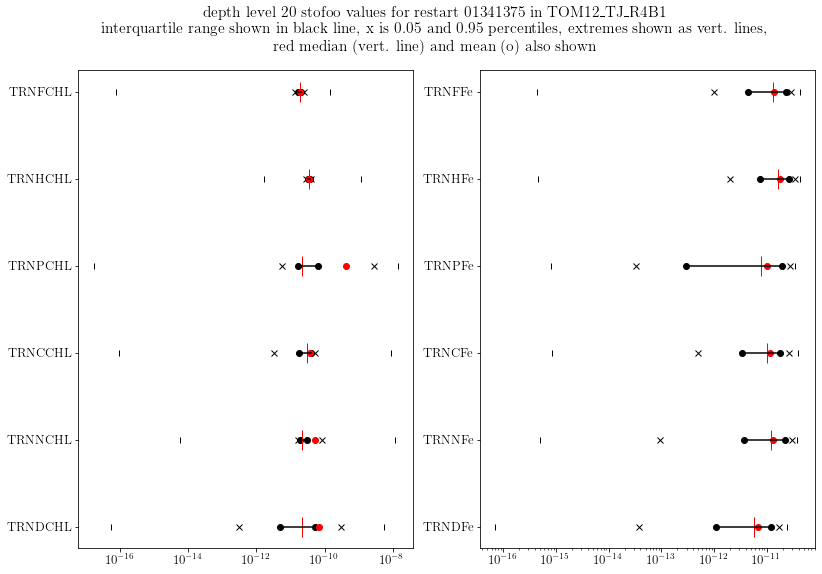

In [14]:
d = 20

vars1 = ['TRNDCHL',\
        'TRNNCHL',\
        'TRNCCHL',\
        'TRNPCHL',\
        'TRNHCHL',\
        'TRNFCHL']

vars2 = ['TRNDFe',\
        'TRNNFe',
        'TRNCFe', 
        'TRNPFe', 
        'TRNHFe', 
        'TRNFFe',]

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,6):
    
    tm = i+1
    
    test = w[vars1[i]][0,d,:,:].values
    nmi = np.min(test[test >0])
    nmax = np.max(test)
    csize = w.csize[0,d,:,:].values
    wq = DescrStatsW(data=np.ravel(test), weights=np.ravel(csize))
    wq.quantile(probs=np.array([0.5, 0.9]), return_pandas=False)

    # p01 = wq.quantile(probs=np.array([0.01]), return_pandas=False)
    p05 = wq.quantile(probs=np.array([0.05]), return_pandas=False)
    p25 = wq.quantile(probs=np.array([0.25]), return_pandas=False)
    p50 = wq.quantile(probs=np.array([0.50]), return_pandas=False)
    p75 = wq.quantile(probs=np.array([0.75]), return_pandas=False)
    p95 = wq.quantile(probs=np.array([0.95]), return_pandas=False)
    p99 = wq.quantile(probs=np.array([0.99]), return_pandas=False)
    mn = wq.mean

    axs[0].plot(nmi,tm,'k|')
    axs[0].plot(nmax,tm,'k|')
    axs[0].plot(p05,tm,'kx')
    axs[0].plot(p95,tm,'kx')
    axs[0].plot(p25,tm,'ko')
    axs[0].plot(p50,tm,'r|', markersize = 20)
    axs[0].plot(p75,tm,'ko')
    axs[0].plot(mn,tm,'ro')
    axs[0].axhline(y = tm, xmin = p25, xmax = p75)
    
    x_points = [p25, p75]
    y_points = [tm, tm]
    axs[0].plot(x_points, y_points, color = 'k')
    
axs[0].set_xscale('log')
axs[0].set_yticks(np.arange(1,7))
axs[0].set_yticklabels(vars1)


for i in range(0,6):
    
    tm = i+1
    
    test = w[vars2[i]][0,d,:,:].values
    nmi = np.min(test[test >0])
    nmax = np.max(test)
    csize = w.csize[0,d,:,:].values
    wq = DescrStatsW(data=np.ravel(test), weights=np.ravel(csize))
    wq.quantile(probs=np.array([0.5, 0.9]), return_pandas=False)

    # p01 = wq.quantile(probs=np.array([0.01]), return_pandas=False)
    p05 = wq.quantile(probs=np.array([0.05]), return_pandas=False)
    p25 = wq.quantile(probs=np.array([0.25]), return_pandas=False)
    p50 = wq.quantile(probs=np.array([0.50]), return_pandas=False)
    p75 = wq.quantile(probs=np.array([0.75]), return_pandas=False)
    p95 = wq.quantile(probs=np.array([0.95]), return_pandas=False)
    #p99 = wq.quantile(probs=np.array([0.99]), return_pandas=False)
    mn = wq.mean

    axs[1].plot(nmi,tm,'k|')
    axs[1].plot(nmax,tm,'k|')
    axs[1].plot(p05,tm,'kx')
    axs[1].plot(p95,tm,'kx')
    axs[1].plot(p25,tm,'ko')
    axs[1].plot(p50,tm,'r|', markersize = 20)
    axs[1].plot(p75,tm,'ko')
    axs[1].plot(mn,tm,'ro')
    axs[1].axhline(y = tm, xmin = p25, xmax = p75)
    
    x_points = [p25, p75]
    y_points = [tm, tm]
    axs[1].plot(x_points, y_points, color = 'k')
    
axs[1].set_xscale('log')
axs[1].set_yticks(np.arange(1,7))
axs[1].set_yticklabels(vars2)

plt.suptitle(f'depth level {d} stofoo values for restart 01341375 in TOM12_TJ_R4B1 \n interquartile range shown in black line, x is 0.05 and 0.95 percentiles, extremes shown as vert. lines, \n red median (vert. line) and mean (o) also shown')



0.17365022749073214
3.692299907508493e-05

4.179339416946032
0.0001284577634447926

0.02775376920227337
7.297529243569579e-05

0.02227082805814677
1.6628991856328566e-05

0.7649424077641801
0.00013869991281142545

0.05127437405676545
0.0001436876272249763



Text(0.5, 0.98, 'depth level 10 Fe/C and CHL/C ratio values for restart 01341375 in TOM12_TJ_R4B1 \n interquartile range shown in black line, x is 0.05 and 0.95 percentiles, extremes shown as vert. lines, \n red median (vert. line) and mean (o) also shown')

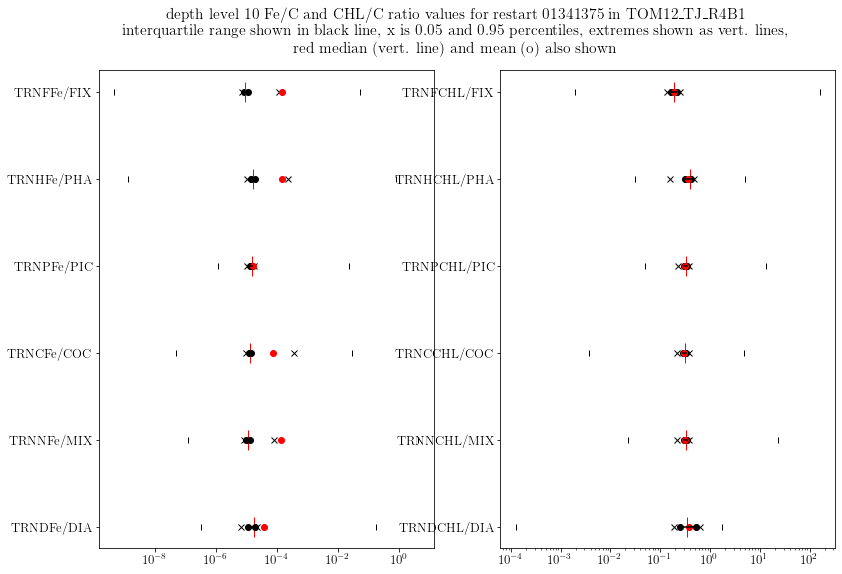

In [15]:
d = 10

ss =  ['TRNDFe', 'TRNNFe', 'TRNCFe', 'TRNPFe', 'TRNHFe', 'TRNFFe',]
sc =  ['TRNDCHL', 'TRNNCHL', 'TRNCCHL', 'TRNPCHL', 'TRNHCHL', 'TRNFCHL',]
sp =  ['TRNDIA', 'TRNMIX', 'TRNCOC', 'TRNPIC', 'TRNPHA', 'TRNFIX',]

ssl =  ['TRNDFe/DIA', 'TRNNFe/MIX', 'TRNCFe/COC', 'TRNPFe/PIC', 'TRNHFe/PHA', 'TRNFFe/FIX',]
sslc =  ['TRNDCHL/DIA', 'TRNNCHL/MIX', 'TRNCCHL/COC', 'TRNPCHL/PIC', 'TRNHCHL/PHA', 'TRNFCHL/FIX',]


fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,6):
    
    tm = i+1
    
    test = dss[ss[i]][0,d,:,:].values/dsp[sp[i]][0,d,:,:].values
    test[np.where(np.isnan(test))] = 0
    test[np.where(np.isinf(test))] = 0
    nmi = np.nanmin(test[test >0])
    nmax = np.nanmax(test)

    csize = w.csize[0,d,:,:].values
    csize[np.where(test == 0)] = 0

    
    wq = DescrStatsW(data=np.ravel(test), weights=np.ravel(csize))
    

    # p01 = wq.quantile(probs=np.array([0.01]), return_pandas=False)
    p05 = wq.quantile(probs=np.array([0.05]), return_pandas=False)
    p25 = wq.quantile(probs=np.array([0.25]), return_pandas=False)
    p50 = wq.quantile(probs=np.array([0.50]), return_pandas=False)
    p75 = wq.quantile(probs=np.array([0.75]), return_pandas=False)
    p95 = wq.quantile(probs=np.array([0.95]), return_pandas=False)
    p99 = wq.quantile(probs=np.array([0.99]), return_pandas=False)
    mn = wq.mean
    print(nmax)
    print(mn)
    print()

    axs[0].plot(nmi,tm,'k|')
    axs[0].plot(nmax,tm,'k|')
    axs[0].plot(p05,tm,'kx')
    axs[0].plot(p95,tm,'kx')
    axs[0].plot(p25,tm,'ko')
    axs[0].plot(p50,tm,'r|', markersize = 20)
    axs[0].plot(p75,tm,'ko')
    axs[0].plot(mn,tm,'ro')
    
    x_points = [p25, p75]
    y_points = [tm, tm]
    axs[0].plot(x_points, y_points, color = 'k')
    
axs[0].set_xscale('log')
axs[0].set_yticks(np.arange(1,7))
axs[0].set_yticklabels(ssl)

for i in range(0,6):
    
    tm = i+1
    
    test = dss[sc[i]][0,d,:,:].values/dsp[sp[i]][0,d,:,:].values
    test[np.where(np.isnan(test))] = 0
    test[np.where(np.isinf(test))] = 0
    nmi = np.nanmin(test[test >0])
    nmax = np.nanmax(test)

    csize = w.csize[0,d,:,:].values
    csize[np.where(test == 0)] = 0
    wq = DescrStatsW(data=np.ravel(test), weights=np.ravel(csize))
    
    p05 = wq.quantile(probs=np.array([0.05]), return_pandas=False)
    p25 = wq.quantile(probs=np.array([0.25]), return_pandas=False)
    p50 = wq.quantile(probs=np.array([0.50]), return_pandas=False)
    p75 = wq.quantile(probs=np.array([0.75]), return_pandas=False)
    p95 = wq.quantile(probs=np.array([0.95]), return_pandas=False)
    p99 = wq.quantile(probs=np.array([0.99]), return_pandas=False)
    mn = wq.mean

    axs[1].plot(nmi,tm,'k|')
    axs[1].plot(nmax,tm,'k|')
    axs[1].plot(p05,tm,'kx')
    axs[1].plot(p95,tm,'kx')
    axs[1].plot(p25,tm,'ko')
    axs[1].plot(p50,tm,'r|', markersize = 20)
    axs[1].plot(p75,tm,'ko')
    axs[1].plot(mn,tm,'ro')
    
    x_points = [p25, p75]
    y_points = [tm, tm]
    axs[1].plot(x_points, y_points, color = 'k')
    
axs[1].set_xscale('log')
axs[1].set_yticks(np.arange(1,7))
axs[1].set_yticklabels(sslc)


plt.suptitle(f'depth level {d} Fe/C and CHL/C ratio values for restart 01341375 in TOM12_TJ_R4B1 \n interquartile range shown in black line, x is 0.05 and 0.95 percentiles, extremes shown as vert. lines, \n red median (vert. line) and mean (o) also shown')



## make lookup table

In [16]:
columns = ['pmi', 'p0.05', 'p0.25', 'p0.50', 'p0.75', 'p0.95', 'pma','pmn']
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

# Create an empty DataFrame
stofoo2_fe = pd.DataFrame(columns=columns, index=rows)

stofoo2_fe.loc[rows[0], 'pmi'] = 7

stofoo2_fe

,pmi,p0.05,p0.25,p0.50,p0.75,p0.95,pma,pmn
DIA,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
w = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')
w = w.assign(csize=w['e3t_0'])
csize = np.zeros([1,31,149,182])
for i in range(0,31):
    csize[0,i,:,:] = w.tmask[0,i,:,:] * w.e1t[0,:,:] * w.e2t[0,:,:]
w['csize'].values = csize

ex = True
if ex:
    
    for d in range(0,20):

        print(d)

        columns = ['pmi', 'p0.05', 'p0.25', 'p0.50', 'p0.75', 'p0.95', 'pma','pmn']
        rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

        # Create an empty DataFrame
        stofoo2_fe = pd.DataFrame(columns=columns, index=rows)
        stofoo3_chl = pd.DataFrame(columns=columns, index=rows)

        ss =  ['TRNDFe', 'TRNNFe', 'TRNCFe', 'TRNPFe', 'TRNHFe', 'TRNFFe',]
        sc =  ['TRNDCHL', 'TRNNCHL', 'TRNCCHL', 'TRNPCHL', 'TRNHCHL', 'TRNFCHL',]
        sp =  ['TRNDIA', 'TRNMIX', 'TRNCOC', 'TRNPIC', 'TRNPHA', 'TRNFIX',]
        rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

        ssl =  ['TRNDFe/DIA', 'TRNNFe/MIX', 'TRNCFe/COC', 'TRNPFe/PIC', 'TRNHFe/PHA', 'TRNFFe/FIX',]
        sslc =  ['TRNDCHL/DIA', 'TRNNCHL/MIX', 'TRNCCHL/COC', 'TRNPCHL/PIC', 'TRNHCHL/PHA', 'TRNFCHL/FIX',]



        for i in range(0,6):

            test = dss[ss[i]][0,d,:,:].values/dsp[sp[i]][0,d,:,:].values
            test[np.where(np.isnan(test))] = 0
            test[np.where(np.isinf(test))] = 0
            nmi = np.nanmin(test[test >0])
            nmax = np.nanmax(test)

            csize = w.csize[0,d,:,:].values
            csize[np.where(test == 0)] = 0


            wq = DescrStatsW(data=np.ravel(test), weights=np.ravel(csize))

            p05 = wq.quantile(probs=np.array([0.05]), return_pandas=False)
            p25 = wq.quantile(probs=np.array([0.25]), return_pandas=False)
            p50 = wq.quantile(probs=np.array([0.50]), return_pandas=False)
            p75 = wq.quantile(probs=np.array([0.75]), return_pandas=False)
            p95 = wq.quantile(probs=np.array([0.95]), return_pandas=False)
            p99 = wq.quantile(probs=np.array([0.99]), return_pandas=False)
            pmn = wq.mean
            nmi = np.nanmin(test[test >0])
            nmax = np.nanmax(test)
            
            #stofoo2_fe.loc[rows[0], 'pmi'] = 7
            stofoo2_fe.loc[rows[i], 'pmi'] = nmi
            stofoo2_fe.loc[rows[i], 'pma'] = nmax
            stofoo2_fe.loc[rows[i], 'p0.05'] = p05[0]
            stofoo2_fe.loc[rows[i], 'p0.25'] = p25[0]
            stofoo2_fe.loc[rows[i], 'p0.50'] = p50[0]
            stofoo2_fe.loc[rows[i], 'p0.75'] = p75[0]
            stofoo2_fe.loc[rows[i], 'p0.95'] = p95[0]
            stofoo2_fe.loc[rows[i], 'pmn'] = pmn
            
            stofoo2_fe = pd.DataFrame(stofoo2_fe.values, index=rows, columns=columns,)

            test = dss[sc[i]][0,d,:,:].values/dsp[sp[i]][0,d,:,:].values
            test[np.where(np.isnan(test))] = 0
            test[np.where(np.isinf(test))] = 0
            nmi = np.nanmin(test[test >0])
            nmax = np.nanmax(test)

            csize = w.csize[0,d,:,:].values
            csize[np.where(test == 0)] = 0


            wq = DescrStatsW(data=np.ravel(test), weights=np.ravel(csize))

            p05 = wq.quantile(probs=np.array([0.05]), return_pandas=False)
            p25 = wq.quantile(probs=np.array([0.25]), return_pandas=False)
            p50 = wq.quantile(probs=np.array([0.50]), return_pandas=False)
            p75 = wq.quantile(probs=np.array([0.75]), return_pandas=False)
            p95 = wq.quantile(probs=np.array([0.95]), return_pandas=False)
            p99 = wq.quantile(probs=np.array([0.99]), return_pandas=False)
            pmn = wq.mean
            nmi = np.nanmin(test[test >0])
            nmax = np.nanmax(test)

            stofoo3_chl.loc[rows[i], 'pmi'] = nmi
            stofoo3_chl.loc[rows[i], 'pma'] = nmax
            stofoo3_chl.loc[rows[i], 'p0.05'] = p05[0]
            stofoo3_chl.loc[rows[i], 'p0.25'] = p25[0]
            stofoo3_chl.loc[rows[i], 'p0.50'] = p50[0]
            stofoo3_chl.loc[rows[i], 'p0.75'] = p75[0]
            stofoo3_chl.loc[rows[i], 'p0.95'] = p95[0]
            stofoo3_chl.loc[rows[i], 'pmn'] = pmn
            
            
            stofoo3_chl = pd.DataFrame(stofoo3_chl.values, index=rows, columns=columns,)

            stofoo2_fe.to_csv(f'./data/stofoo_lookup/stofoo2_fe_d{d}.csv')
            stofoo3_chl.to_csv(f'./data/stofoo_lookup/stofoo3_chl_d{d}.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [18]:
d = 0
w = pd.read_csv(f'./data/stofoo_lookup/stofoo2_fe_d{d}.csv')


w

,Unnamed: 0,pmi,p0.05,p0.25,p0.50,p0.75,p0.95,pma,pmn
0,DIA,4.083291e-06,0.000006,0.000013,0.000016,0.000018,0.000019,0.000576,0.000015
1,MIX,2.483964e-06,0.000006,0.000008,0.000011,0.000014,0.000017,0.000026,0.000011
2,COC,5.709320e-07,0.000007,0.000010,0.000012,0.000014,0.000017,0.000559,0.000012
3,PIC,4.369895e-06,0.000008,0.000012,0.000014,0.000016,0.000018,0.000055,0.000014
4,PHA,7.590971e-08,0.000006,0.000013,0.000017,0.000019,0.000020,0.001989,0.000018
5,FIX,3.340604e-09,0.000006,0.000006,0.000007,0.000010,0.000015,0.001723,0.000009


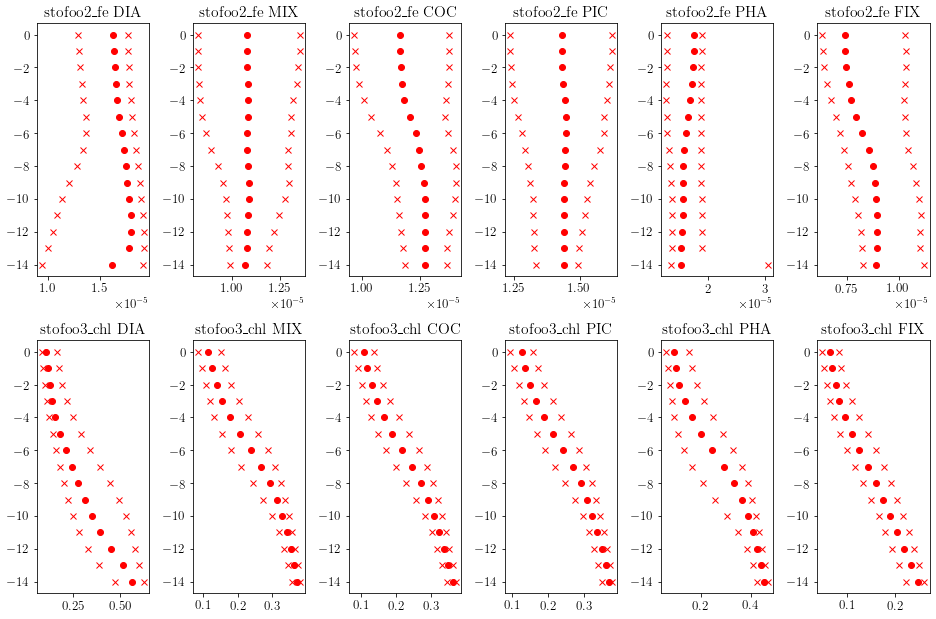

In [19]:
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

#value = df.loc['FIX', 'pmi']

fact = 1.1
fig, axs = plt.subplots(2,6, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


    
for i in range(0,6):

    for d in range(0,15):
    
        stofoo2_fe = pd.read_csv(f'./data/stofoo_lookup/stofoo2_fe_d{d}.csv')
        stofoo2_fe.index = rows
        
        stofoo3_chl = pd.read_csv(f'./data/stofoo_lookup/stofoo3_chl_d{d}.csv')
        stofoo3_chl.index = rows
        
        axs[i].plot(stofoo2_fe.loc[rows[i],'p0.50'],-d,'ro')
        axs[i].plot(stofoo2_fe.loc[rows[i],'p0.25'],-d,'rx')
        axs[i].plot(stofoo2_fe.loc[rows[i],'p0.75'],-d,'rx')
        
        axs[i+6].plot(stofoo3_chl.loc[rows[i],'p0.50'],-d,'ro')
        axs[i+6].plot(stofoo3_chl.loc[rows[i],'p0.25'],-d,'rx')
        axs[i+6].plot(stofoo3_chl.loc[rows[i],'p0.75'],-d,'rx')
        
    axs[i].set_title(f'stofoo2_fe {rows[i]}')
    axs[i+6].set_title(f'stofoo3_chl {rows[i]}')
        
plt.tight_layout()
    
    

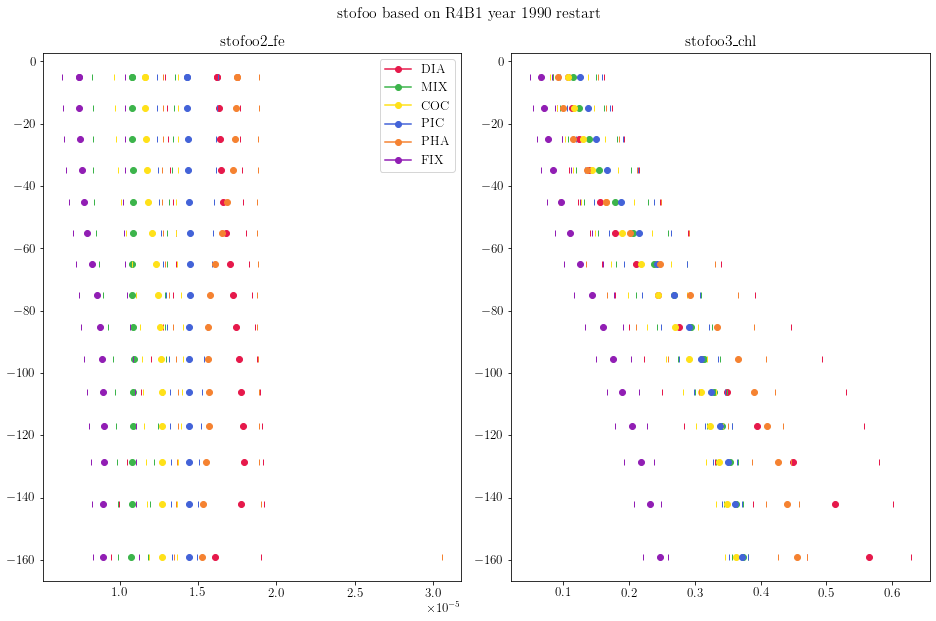

In [20]:
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

xx = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')

#value = df.loc['FIX', 'pmi']

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', \
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', \
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', \
        '#000075', '#808080', '#ffffff', '#000000']
    
for i in range(0,6):

    for d in range(0,15):
    
        stofoo2_fe = pd.read_csv(f'./data/stofoo_lookup/stofoo2_fe_d{d}.csv')
        stofoo2_fe.index = rows
        
        stofoo3_chl = pd.read_csv(f'./data/stofoo_lookup/stofoo3_chl_d{d}.csv')
        stofoo3_chl.index = rows
        
        td = xx.gdept_1d[0,d]
        
        if d == 0:
            axs[0].plot(stofoo2_fe.loc[rows[i],'p0.50'],-td,marker = 'o', color = cols[i], label = rows[i])
        axs[0].plot(stofoo2_fe.loc[rows[i],'p0.50'],-td,marker = 'o', color = cols[i])
        axs[0].plot(stofoo2_fe.loc[rows[i],'p0.25'],-td,marker = '|', color = cols[i])
        axs[0].plot(stofoo2_fe.loc[rows[i],'p0.75'],-td,marker = '|', color = cols[i])
        
        axs[1].plot(stofoo3_chl.loc[rows[i],'p0.50'],-td,marker = 'o', color = cols[i])
        axs[1].plot(stofoo3_chl.loc[rows[i],'p0.25'],-td,marker = '|', color = cols[i])
        axs[1].plot(stofoo3_chl.loc[rows[i],'p0.75'],-td,marker = '|', color = cols[i])
        
    axs[0].set_title(f'stofoo2_fe')
    axs[1].set_title(f'stofoo3_chl')
    
    axs[0].legend(loc = 'best')
    
    plt.suptitle('stofoo based on R4B1 year 1990 restart')
plt.tight_layout()
    
    

['deptht_bounds', 'Alkalini', 'time_centered_bounds', 'time_counter_bounds', 'O2', 'DIC', 'PIIC', 'NO3', 'Si', 'PO4', 'Fer', 'DOC', 'CaCO3', 'ARA', 'POC', 'GOC', 'BAC', 'PRO', 'PTE', 'MES', 'GEL', 'MAC', 'DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX', 'BSi', 'GON']


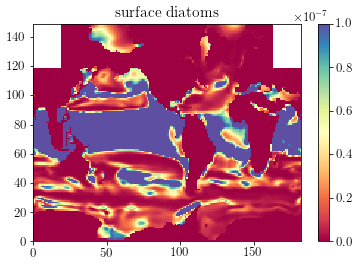

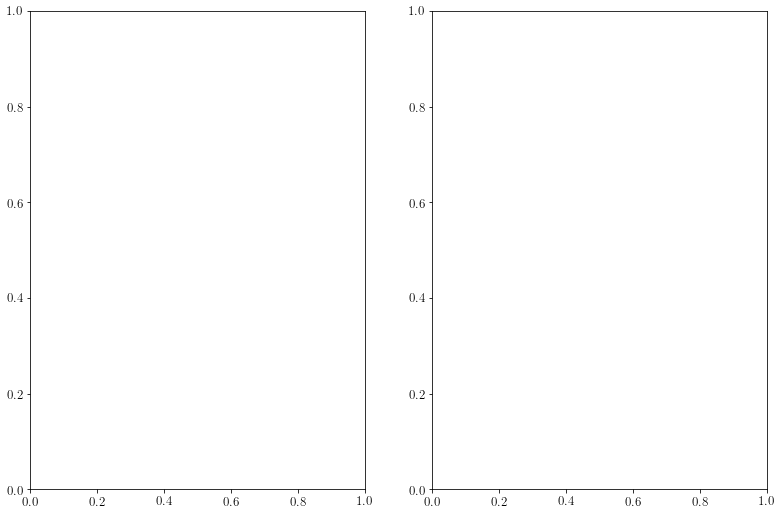

In [21]:
xx = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')
hm = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/ORCA2_1m_20230101_20231231_ptrc_T.nc')

print(list(hm.data_vars.keys()))

plt.figure()
q = plt.pcolormesh(hm['DIA'][0,15,:,:], cmap = cmap, vmin = 0, vmax = 1e-7)
plt.colorbar(q)
plt.title('surface diatoms')
                  
                  
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

xx = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')

#value = df.loc['FIX', 'pmi']

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', \
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', \
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', \
        '#000075', '#808080', '#ffffff', '#000000']



NameError: name 'tin' is not defined

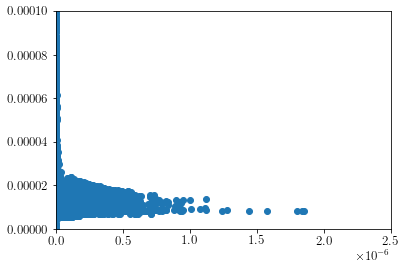

In [22]:


ss =  ['TRNDFe', 'TRNNFe', 'TRNCFe', 'TRNPFe', 'TRNHFe', 'TRNFFe',]
sc =  ['TRNDCHL', 'TRNNCHL', 'TRNCCHL', 'TRNPCHL', 'TRNHCHL', 'TRNFCHL',]
sp =  ['TRNDIA', 'TRNMIX', 'TRNCOC', 'TRNPIC', 'TRNPHA', 'TRNFIX',]

i = 0

plt.figure()
dss[ss[i]][0,d,:,:].values/dsp[sp[i]][0,d,:,:].values

x = dsp['TRNDIA'][0,d,:,:].values
y = dss['TRNDFe'][0,d,:,:].values/dsp['TRNDIA'][0,d,:,:].values
plt.scatter(np.ravel(x),np.ravel(y))
plt.xlim([0,2.5e-6])
plt.ylim([0,0.0001])

tin

In [ ]:
hm = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/ORCA2_1m_20230101_20231231_ptrc_T.nc')

ltd = ['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'kt', 'ndastp', 'adatrj', 'sbc_Alkalini_b', 'sbc_O2_b', 'sbc_DIC_b', 'sbc_PIIC_b', 'sbc_NO3_b', 'sbc_Si_b', 'sbc_PO4_b', 'sbc_Fer_b', 'sbc_DOC_b', 'sbc_DSi_b', 'sbc_CaCO3_b', 'sbc_ARA_b', 'sbc_GON_b', 'sbc_SFe_b', 'sbc_BFe_b', 'sbc_POC_b', 'sbc_GOC_b', 'sbc_BAC_b', 'sbc_PRO_b', 'sbc_PTE_b', 'sbc_MES_b', 'sbc_GEL_b', 'sbc_MAC_b', 'sbc_DIA_b', 'sbc_MIX_b', 'sbc_COC_b', 'sbc_PIC_b', 'sbc_PHA_b', 'sbc_FIX_b', 'sbc_DFe_b', 'sbc_NFe_b', 'sbc_CFe_b', 'sbc_PFe_b', 'sbc_HFe_b', 'sbc_FFe_b', 'sbc_DCHL_b', 'sbc_NCHL_b', 'sbc_CCHL_b', 'sbc_PCHL_b', 'sbc_HCHL_b', 'sbc_FCHL_b', 'sbc_BSi_b', 'rdttrc1', 'TRNAlkalini', 'TRBAlkalini', 'TRNO2', 'TRBO2', 'TRNDIC', 'TRBDIC', 'TRNPIIC', 'TRBPIIC', 'TRNNO3', 'TRBNO3', 'TRNSi', 'TRBSi', 'TRNPO4', 'TRBPO4', 'TRNFer', 'TRBFer', 'TRNDOC', 'TRBDOC', 'TRNDSi', 'TRBDSi', 'TRNCaCO3', 'TRBCaCO3', 'TRNARA', 'TRBARA', 'TRNGON', 'TRBGON', 'TRNSFe', 'TRBSFe', 'TRNBFe', 'TRBBFe', 'TRNPOC', 'TRBPOC', 'TRNGOC', 'TRBGOC', 'TRNBAC', 'TRBBAC', 'TRNPRO', 'TRBPRO', 'TRNPTE', 'TRBPTE', 'TRNMES', 'TRBMES', 'TRNGEL', 'TRBGEL', 'TRNMAC', 'TRBMAC', 'TRNDIA', 'TRBDIA', 'TRNMIX', 'TRBMIX', 'TRNCOC', 'TRBCOC', 'TRNPIC', 'TRBPIC', 'TRNPHA', 'TRBPHA', 'TRNFIX', 'TRBFIX', 'TRNDFe', 'TRBDFe', 'TRNNFe', 'TRBNFe', 'TRNCFe', 'TRBCFe', 'TRNPFe', 'TRBPFe', 'TRNHFe', 'TRBHFe', 'TRNFFe', 'TRBFFe', 'TRNDCHL', 'TRBDCHL', 'TRNNCHL', 'TRBNCHL', 'TRNCCHL', 'TRBCCHL', 'TRNPCHL', 'TRBPCHL', 'TRNHCHL', 'TRBHCHL', 'TRNFCHL', 'TRBFCHL', 'TRNBSi', 'TRBBSi', 'sed_DSi', 'sed_CaCO3', 'sed_ARA', 'sed_GON', 'sed_SFe', 'sed_BFe', 'sed_POC', 'sed_GOC']

In [ ]:
tmesh

## map a dataset

In [ ]:
def get_mapping(var):
    
    storval = np.zeros([149,182])

    hm = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/ORCA2_1m_20230101_20231231_ptrc_T.nc')
    hm_nav_lon = hm.nav_lon.values
    hm_nav_lat = hm.nav_lat.values


    for tn in range(0,10):
        print(tn)
        tdir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/'
        ta = f'ORCA2_01341375_restart_trc_000{tn}.nc'
        
        tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
        tmask = tmesh.tmask[0,0,:,:].values
        
        ds = xr.open_dataset(f'{tdir}{ta}')
        nav_lon = ds.nav_lon.values
        nav_lat = ds.nav_lat.values

        ds_var = ds[var].values
        
        for sy in range(0,32):
            for sx in range(0,20):
                
                t_lon = nav_lon[sy,sx]
                t_lat = nav_lat[sy,sx]

                q = (np.where((hm_nav_lon == t_lon) & (hm_nav_lat == t_lat)))
                try:
                    ey = q[0][0]
                    ex = q[1][0]
                    
                    if (tmask[ey,ex] == 0):
            
                        storval[ey,ex] = -1
                    else:
                        storval[ey,ex] = tn
                except:
                    print(f'rst {tn}, y {sy} doesnt map, x {sx} doesnt map')

    for tn in range(10,48):
        print(tn)
        tdir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/'
        ta = f'ORCA2_01341375_restart_trc_00{tn}.nc'
        
        tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
        tmask = tmesh.tmask[0,0,:,:].values
        
        ds = xr.open_dataset(f'{tdir}{ta}')
        nav_lon = ds.nav_lon.values
        nav_lat = ds.nav_lat.values

        ds_var = ds[var].values
        
        for sy in range(0,32):
            for sx in range(0,20):
                
                t_lon = nav_lon[sy,sx]
                t_lat = nav_lat[sy,sx]

                q = (np.where((hm_nav_lon == t_lon) & (hm_nav_lat == t_lat)))
                try:
                    ey = q[0][0]
                    ex = q[1][0]
                    
                    if (tmask[ey,ex] == 0):
            
                        storval[ey,ex] = -1
                    else:
                        storval[ey,ex] = tn
                except:
                    print(f'rst {tn}, y {sy} doesnt map, x {sx} doesnt map')

    return storval

fleg = get_mapping(var)

In [ ]:
fleg[fleg<0] = np.nan
cmap = plt.get_cmap("Spectral")
plt.figure()
w = plt.pcolormesh(fleg, cmap = cmap, vmin = 0, vmax = 10)
plt.colorbar(w)

plt.figure()
plt.pcolormesh(hm.Alkalini[0,0,:,:], cmap = cmap)

In [ ]:
hm = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4B1/ORCA2_1m_20230101_20231231_ptrc_T.nc')

print(hm.DIA[6,0:25,75,75].values)


print(hm.FIX[6,0:16,75,75].values)